In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
df_train= pd.read_csv('mnist_train.csv')
df_train.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
"""X = df_train.iloc[:,0:].values
Y = df_train.iloc[:,0].values"""

print(df_train.shape)
data_train = np.array(df_train)
m, n = data_train.shape
np.random.shuffle(data_train)

data_train = data_train[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape



(60000, 785)


In [66]:
X_train[:,0].shape, Y_train.shape

((784,), (59000,))

In [67]:
X_train.shape

(784, 59000)

In [71]:
def reLU(Z):
    return np.maximum(0,Z)

def derivative_reLU(Z): 
    return Z>0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

    

def init_params():
    W1 = np.random.randn(10 ,784)
    b1 = np.random.randn(10,1)
    W2 = np.random.rand(10,10 )
    b2 = np.random.rand(10,1)
    return W1, b1, W2, b2


def forprop(W1, b1, W2, b2, X):
     Z1 = W1.dot(X) + b1
     A1 =  reLU(Z1)
     Z2 = W2.dot(A1) + b2
     A2 = softmax(Z2)
     return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backprop(Z1, Z2, A1, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_reLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T) 
    db1 = 1/m * np.sum(dZ1)
    return dW1,db1, dW2, db2
    
def params_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2



    

In [107]:
def pred(A2):
    return np.argmax(A2, axis=0)
def accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1,b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forprop(W1, b1, W2, b2, X_train)
        dW1, db1, dW2, db2= backprop(Z1, Z2, A1, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = params_update(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%100 == 0:
            print(f'Iteration {i}')
            predictions = pred(A2)
            print(accuracy(predictions, Y))
    return W1, b1, W2, b2



In [108]:
gradient_descent(X_train, Y_train, 205, 0.2)

Iteration 0
[0 4 7 ... 7 2 3] [7 1 8 ... 5 4 0]
0.11322033898305085
Iteration 100
[7 1 6 ... 9 9 8] [7 1 8 ... 5 4 0]
0.4276101694915254
Iteration 200
[7 1 6 ... 9 9 8] [7 1 8 ... 5 4 0]
0.5004406779661017


(array([[ 1.24454171, -0.3258502 ,  1.68763702, ..., -0.10635246,
          0.49600107,  0.24400149],
        [ 0.60305622,  0.35487483, -0.54838993, ...,  0.79277583,
          0.20535285, -0.92970352],
        [ 1.0403344 ,  1.08226006,  0.44864489, ..., -1.72047207,
          0.97508167,  1.67226911],
        ...,
        [-1.40680412, -0.82088455, -0.9500943 , ..., -0.12273952,
          0.71362943,  0.7752677 ],
        [ 0.89419262,  1.40406694,  0.98142143, ...,  1.4680725 ,
          0.60281844, -1.48283367],
        [-0.7625704 , -0.35706472,  1.55843743, ..., -0.69180061,
          0.66462544,  0.17278884]]),
 array([[ 1.5342109 ],
        [-1.1629522 ],
        [ 0.95679173],
        [ 0.61075868],
        [-1.50077402],
        [-0.4846679 ],
        [-0.05971221],
        [ 2.56276767],
        [-0.49557473],
        [ 0.88762134]]),
 array([[-0.11023736,  0.3002855 ,  0.5857997 ,  0.17831994,  0.42318895,
          0.47590137,  0.21951073,  0.65844708,  0.62286164,  0.294

In [143]:
def make_predictions(X,W1,b1, W2, b2):
     _ ,_, _, A2 = forprop(W1, b1, W2, b2, X)
     predictions = pred(A2)
     return predictions
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

In [144]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.5)

Iteration 0
[7 0 8 ... 7 8 0] [7 1 8 ... 5 4 0]
0.10616949152542372
Iteration 100
[7 8 8 ... 3 8 4] [7 1 8 ... 5 4 0]
0.4663898305084746
Iteration 200
[7 8 8 ... 3 8 0] [7 1 8 ... 5 4 0]
0.6069152542372881
Iteration 300
[7 1 8 ... 5 8 0] [7 1 8 ... 5 4 0]
0.6681864406779661
Iteration 400
[7 1 8 ... 5 4 0] [7 1 8 ... 5 4 0]
0.723271186440678


Prediction:  [1]
Label:  1


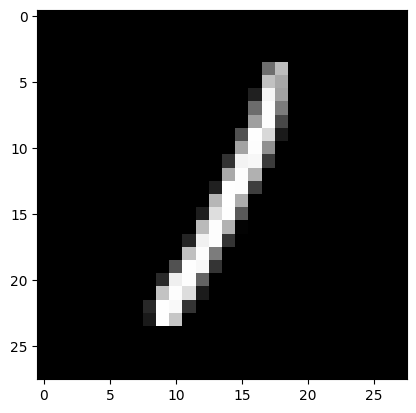

In [145]:
test_prediction(4, W1, b1, W2, b2)

Prediction:  [4]
Label:  4


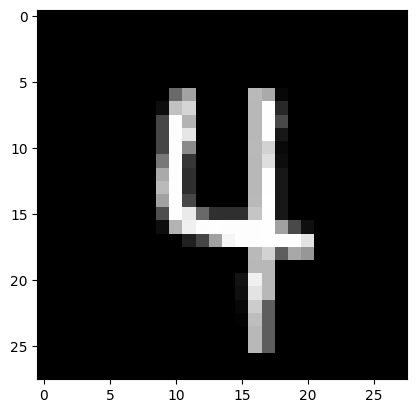

In [ ]:
test_prediction(18, W1, b1, W2, b2)

Prediction:  [2]
Label:  2


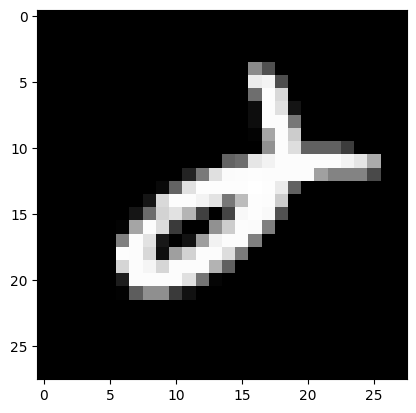

In [151]:
test_prediction(200, W1, b1, W2, b2)

Prediction:  [6]
Label:  5


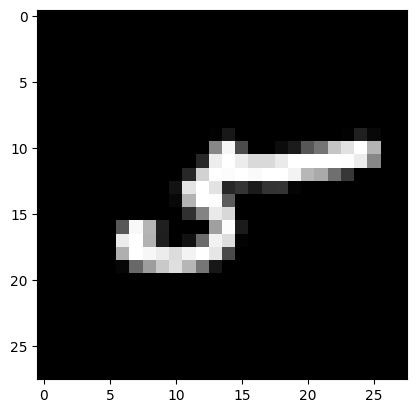

In [154]:
test_prediction(940, W1, b1, W2, b2)

In [155]:
df_test = pd.read_csv('mnist_test.csv')
p,k = df_test.shape

In [172]:
data_test = np.array(df_test).T
Y_test = data_test[0]
X_test = data_test[1:k]

def make_predictions_test(X,W1,b1, W2, b2):
     _ ,_, _, A2 = forprop(W1, b1, W2, b2, X)
     predictions = pred(A2)
     return predictions
def test_prediction_test(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    


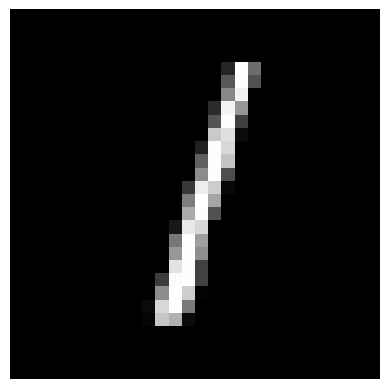

In [173]:
current_image = X_test[:, 2]
current_image = current_image.reshape(28, 28)
plt.imshow(current_image, cmap="gray")
plt.axis("off")
plt.show()



Prediction:  [0]
Label:  0


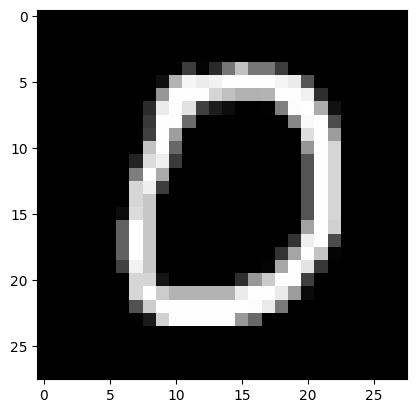

In [174]:
test_prediction_test(10, W1, b1, W2, b2)

Prediction:  [3]
Label:  3


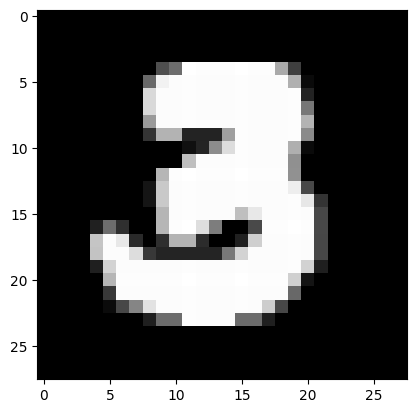

In [175]:
test_prediction_test(200,W1, b1, W2, b2)

Prediction:  [7]
Label:  9


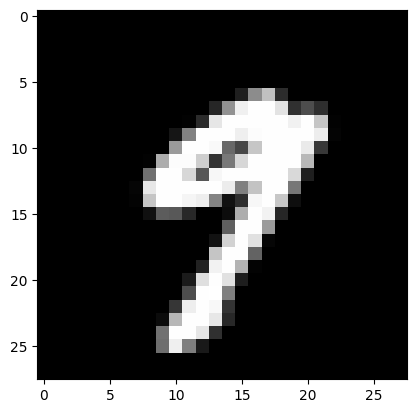

In [176]:
test_prediction_test(20,W1, b1, W2, b2)